In [1]:
import pandas
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
clean_df = pandas.read_csv('BA_clean_dataset.csv')

In [9]:
clean_df.head()

,Title,Author,Country,Rating,Overall_Rating,Date_Published,Type_of_Traveller,Seat_Type,Route,Recommended,Content,Verification_Status,Comment,Month_Posted,Year_Posted
0,Never fly with them again,Erika Greyling,United Kingdom,1.0,10.0,2024-11-03,Couple Leisure,Economy Class,Munich to London Heathrow,no,✅ Trip Verified | I recently travelled from ...,✅ Trip Verified,I recently travelled from Munich to London ...,11,2024
1,Still have not heard any updates,S Wozniak,United States,3.0,10.0,2024-11-03,Couple Leisure,Premium Economy,Heathrow to Boston,no,Not Verified | I paid for seats 80 A and B on...,Not Verified,I paid for seats 80 A and B on my flight fro...,11,2024
2,Cabin crew were nice,Barnaby Emmerson,United Kingdom,7.0,10.0,2024-11-03,Family Leisure,Economy Class,Los Angeles to London Heathrow,yes,"Not Verified | The flight wasn’t that bad, alt...",Not Verified,"The flight wasn’t that bad, although the Infl...",11,2024
3,Support staff wash their hands of you,Charlotte Parsons,United Kingdom,1.0,10.0,2024-11-02,Family Leisure,Premium Economy,Vancouver to London,no,✅ Trip Verified | I decided to treat myself a...,✅ Trip Verified,I decided to treat myself and my teenage dau...,11,2024
4,"No fuss, no bother experience",R. Wrightman,Canada,9.0,10.0,2024-11-02,Solo Leisure,Economy Class,Vancouver to Gatwick,yes,Not Verified | I was very impressed with thei...,Not Verified,I was very impressed with their efficient bo...,11,2024


In [11]:
#find count, mean, std, min, and percentiles in the ratings excluding N/A
clean_df['Rating'].describe()

count    3372.000000
mean        4.517497
std         3.148645
min         1.000000
25%         1.000000
50%         4.000000
75%         8.000000
max        10.000000
Name: Rating, dtype: float64

In [13]:
# count rows where rate is not provided
clean_df['Rating'].isna().sum()

1

In [15]:
# Calculate the count of each rating
rating_counts = clean_df['Rating'].value_counts(dropna=True)  # dropna=True ignores NaN values

# Calculate the percentage for each rating
rating_percentages = (rating_counts / rating_counts.sum()) * 100

# Display the result
print(rating_percentages)

Rating
1.0     25.682088
2.0     11.832740
3.0     11.506524
8.0      9.727165
10.0     8.036773
7.0      7.918149
9.0      7.443654
4.0      6.850534
5.0      6.138790
6.0      4.863582
Name: count, dtype: float64


In [17]:
# before analysis on percentage of ratings based on type of traveller, first identify whether a large percentage are nulls
# Calculate the total number of responses
total_responses = len(clean_df)

# Calculate the number of responses where 'Type_of_Traveller' is N/A
na_traveller_count = clean_df['Type_of_Traveller'].isna().sum()

# Calculate the percentage
na_traveller_percentage = (na_traveller_count / total_responses) * 100

# Display the result
print(f"Percentage of responses where 'Type_of_Traveller' is N/A: {na_traveller_percentage:.2f}%")
#the nulls are less than 10% which makes it a good basis for analysis 

Percentage of responses where 'Type_of_Traveller' is N/A: 8.30%


In [19]:
# calculate the percentage of ratings based on type of traveller
# Group by 'Type_of_Traveller' and 'Rating' and count occurrences
traveller_rating_counts = clean_df.groupby(['Type_of_Traveller', 'Rating']).size()

# Calculate the total responses per 'Type_of_Traveller' to get percentages
traveller_totals = clean_df.groupby('Type_of_Traveller').size()

# Calculate the percentage for each rating within each 'Type_of_Traveller' group
rating_percentages_by_traveller = (traveller_rating_counts / traveller_totals) * 100

# Reset the index to make it easier to view as a DataFrame
rating_percentages_by_traveller = rating_percentages_by_traveller.reset_index(name='Percentage')

# Display the result
print(rating_percentages_by_traveller)
# it seems the poor rating is not attributed to a specific type of traveller but rather is the same across all

   Type_of_Traveller  Rating  Percentage
0           Business     1.0   31.689088
1           Business     2.0   15.246637
2           Business     3.0   16.591928
3           Business     4.0    7.324365
4           Business     5.0    6.726457
5           Business     6.0    4.783259
6           Business     7.0    4.932735
7           Business     8.0    5.979073
8           Business     9.0    3.437967
9           Business    10.0    3.288490
10    Couple Leisure     1.0   26.768642
11    Couple Leisure     2.0   10.994264
12    Couple Leisure     3.0   10.516252
13    Couple Leisure     4.0    7.456979
14    Couple Leisure     5.0    7.170172
15    Couple Leisure     6.0    4.588910
16    Couple Leisure     7.0    7.552581
17    Couple Leisure     8.0    9.847036
18    Couple Leisure     9.0    7.934990
19    Couple Leisure    10.0    7.170172
20    Family Leisure     1.0   31.860465
21    Family Leisure     2.0   10.465116
22    Family Leisure     3.0   12.093023
23    Family Lei

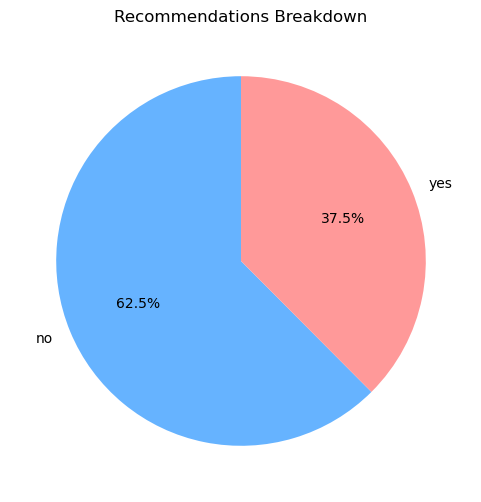

In [21]:
# visualize the percentage of traveller who would receommend BA as a airline for travel

# Count occurrences of each unique value in the 'Recommended' column
recommend_counts = clean_df['Recommended'].value_counts()

# Define labels and sizes for the pie chart
labels = recommend_counts.index  # "Yes", "No", etc.
sizes = recommend_counts.values  # Counts of each label

# Create the pie chart and specify its attributes
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#ff9999'])
plt.title('Recommendations Breakdown')
plt.show()


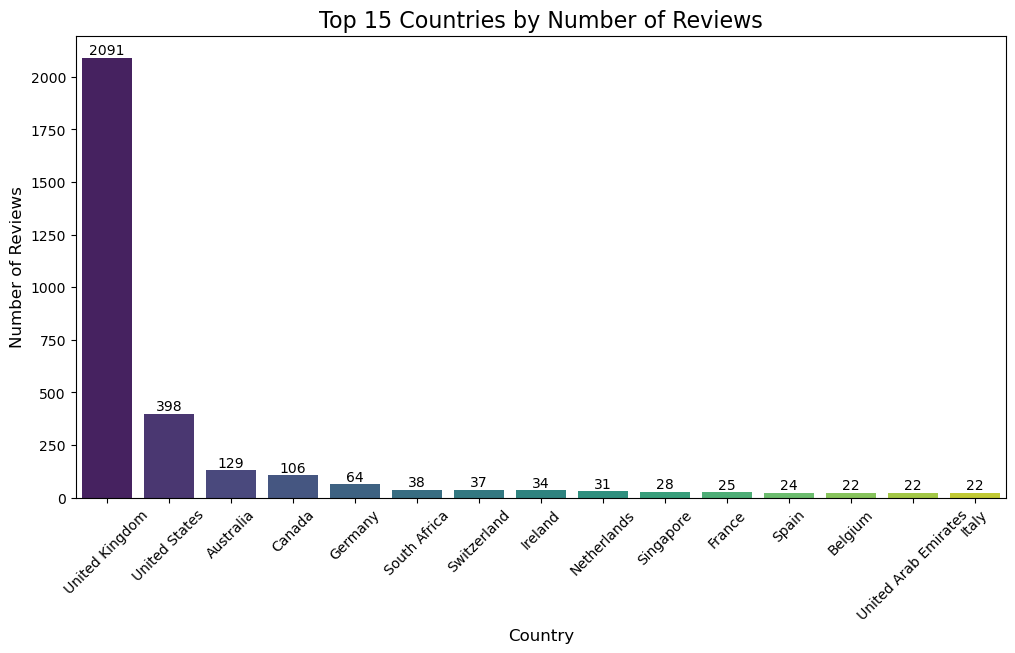

In [23]:
# Group by country and count occurrences
country_counts = clean_df['Country'].value_counts()

# Filter for the top 15 countries
top_15_countries = country_counts.head(15)

# Plot using seaborn for a styled barplot
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=top_15_countries.index, y=top_15_countries.values, palette="viridis")

# Add totals on top of each bar
for i, value in enumerate(top_15_countries.values):
    plt.text(
        i,  # x-coordinate (index of the bar)
        value + 1,  # y-coordinate (slightly above the bar)
        str(value),  # The text to display (the total)
        ha='center',  # Horizontal alignment
        va='bottom',  # Vertical alignment
        fontsize=10   # Font size
    )

plt.title('Top 15 Countries by Number of Reviews', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)
plt.xticks(rotation=45)
plt.show()


In [25]:
# calculate the percentage of ratings based on year
# Group by 'Year_Posted' and 'Rating' and count occurrences
year_rating_counts = clean_df.groupby(['Year_Posted', 'Rating']).size()

# Calculate the total responses per 'Year_Posted' to get percentages
year_totals = clean_df.groupby('Year_Posted').size()

# Calculate the percentage for each rating within each 'Year_Posted' group
rating_percentages_by_year = (year_rating_counts / year_totals) * 100

# Reset the index to make it easier to view as a DataFrame
rating_percentages_by_year = rating_percentages_by_year.reset_index(name='Percentage')

# Display the result
# To Temporarily show all rows use the function below but then place the print within the with function i.e. below the word pandas
# with pandas.option_context('display.max_rows', None, 'display.max_columns', None):
print(rating_percentages_by_year)

     Year_Posted  Rating  Percentage
0           2014     1.0   18.518519
1           2014     2.0    3.703704
2           2014     3.0    7.407407
3           2014     4.0    3.703704
4           2014     5.0   11.111111
..           ...     ...         ...
105         2024     6.0    4.458599
106         2024     7.0    3.184713
107         2024     8.0    9.554140
108         2024     9.0    6.369427
109         2024    10.0    5.095541

[110 rows x 3 columns]


C:\Users\smule\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\smule\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


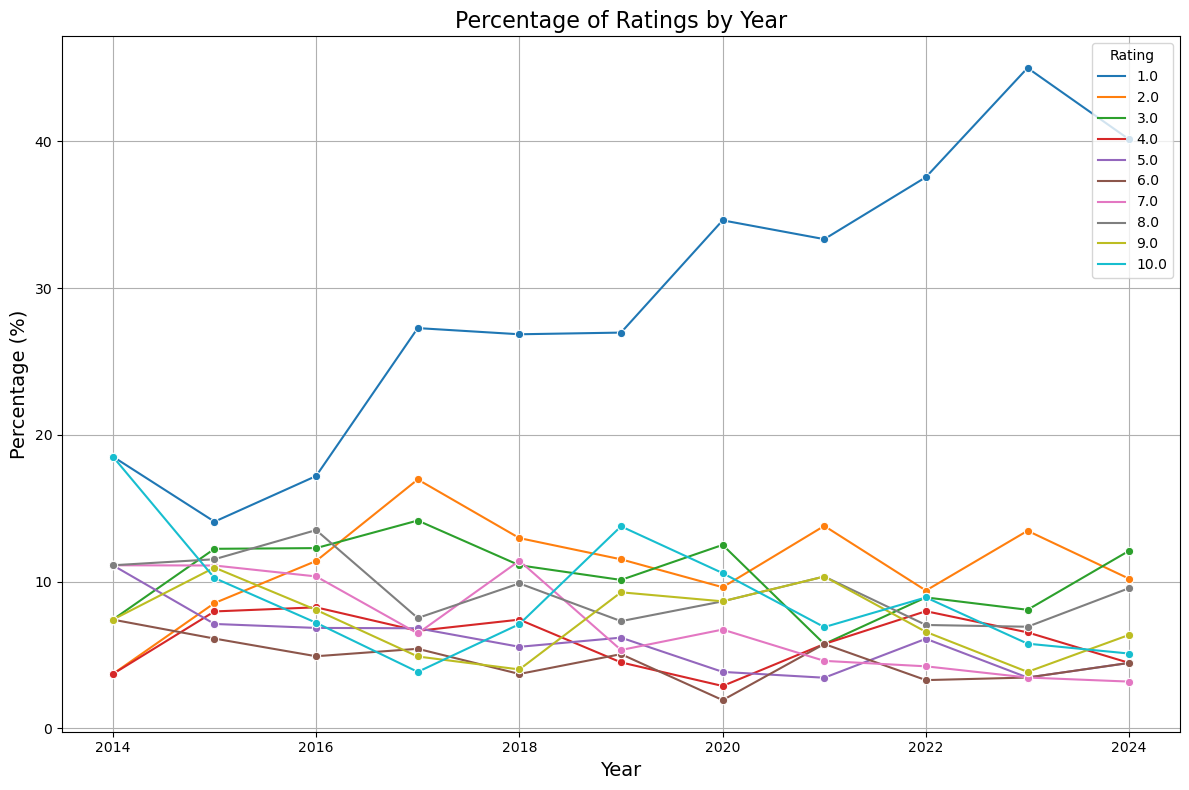

In [47]:
# Replace infinite values with NaN
rating_percentages_by_year.replace([float('inf'), float('-inf')], pandas.NA, inplace=True)

# Drop rows with NaN or handle them
rating_percentages_by_year.dropna(subset=['Percentage'], inplace=True)

# visualize the above in a time series
plt.figure(figsize=(12, 8))  # Adjust the size as needed
sns.lineplot(
    data=rating_percentages_by_year,
    x='Year_Posted',
    y='Percentage',
    hue='Rating',
    marker='o',
    palette='tab10'  # Examples: 'viridis', 'plasma', 'coolwarm', etc.
)

# Add title and labels
plt.title('Percentage of Ratings by Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Percentage (%)', fontsize=14)
plt.legend(title='Rating', loc='upper right')
plt.grid(True)

plt.tight_layout()
plt.show()

# the % of customers rating the airline poorly(1) has been increasing over the years,prominence observed from 2016-2017,2019-2020,and 2021-2023